### 1. Data agumentation

이미지 증강의 성능 개선을 보자.

In [6]:
!python -m wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip


Saved under cats_and_dogs_filtered.zip


In [1]:
import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size =20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size =(150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
import sys
sys.version
import scipy
scipy.__version__

'1.10.1'

In [5]:
epochs=20
model = create_model()
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = epochs,
    validation_data =validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/20
100/100 - 29s - loss: 0.6932 - accuracy: 0.5250 - val_loss: 0.6859 - val_accuracy: 0.5010 - 29s/epoch - 294ms/step
Epoch 2/20
100/100 - 24s - loss: 0.6800 - accuracy: 0.5580 - val_loss: 0.6808 - val_accuracy: 0.5140 - 24s/epoch - 243ms/step
Epoch 3/20
100/100 - 24s - loss: 0.6590 - accuracy: 0.6055 - val_loss: 0.6461 - val_accuracy: 0.6210 - 24s/epoch - 236ms/step
Epoch 4/20
100/100 - 24s - loss: 0.6317 - accuracy: 0.6535 - val_loss: 0.6339 - val_accuracy: 0.6210 - 24s/epoch - 241ms/step
Epoch 5/20
100/100 - 24s - loss: 0.6030 - accuracy: 0.6705 - val_loss: 0.6050 - val_accuracy: 0.6830 - 24s/epoch - 239ms/step
Epoch 6/20
100/100 - 24s - loss: 0.5776 - accuracy: 0.6935 - val_loss: 0.5841 - val_accuracy: 0.6990 - 24s/epoch - 236ms/step
Epoch 7/20
100/100 - 24s - loss: 0.5400 - accuracy: 0.7235 - val_loss: 0.5581 - val_accuracy: 0.7070 - 24s/epoch - 244ms/step
Epoch 8/20
100/100 - 25s - loss: 0.5171 - accuracy: 0.7335 - val_loss: 0.5536 - val_accuracy: 0.7200 - 25s/epoch - 245

In [7]:
import matplotlib.pyplot as plt
def plot_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Val acc')
    plt.title('acc')
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Val loss')
    plt.title('loss')
    plt.legend()
    plt.show()


ImageDataGenerator는 매 epoch마다 이미지 증강을 하여 batch를 생성한다.
즉 1번 학습할 때마다, 이미지 배치가 새로 생성되어 일반성을 더 가져갈 수 있다.

In [8]:

train_datagen = ImageDataGenerator(
    rescale=1./255,         # 픽셀조정
    rotation_range=40,      # 회전
    width_shift_range=0.2,  # 가로이동
    height_shift_range=0.2, # 세로 이동
    shear_range=0.2,        # 일부 영역을 압축, 늘리기    x' = x + m*y
                                                        #y' = n*x + y
    zoom_range=0.2,         # 이미지 확대
    horizontal_flip=True,   # 좌우 반전
    fill_mode = 'nearest')  # 새롭게 생성된 픽셀들을 채우는 방법.

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size =20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size =(150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

model_aug = create_model()
history_aug = model_aug.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = epochs,
    validation_data =validation_generator,
    validation_steps=50,
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 25s - loss: 0.6909 - accuracy: 0.5190 - val_loss: 0.6876 - val_accuracy: 0.6090 - 25s/epoch - 254ms/step
Epoch 2/20
100/100 - 24s - loss: 0.6858 - accuracy: 0.5630 - val_loss: 0.6759 - val_accuracy: 0.6010 - 24s/epoch - 245ms/step
Epoch 3/20
100/100 - 24s - loss: 0.6821 - accuracy: 0.5485 - val_loss: 0.6640 - val_accuracy: 0.5980 - 24s/epoch - 244ms/step
Epoch 4/20
100/100 - 24s - loss: 0.6735 - accuracy: 0.5805 - val_loss: 0.6523 - val_accuracy: 0.6030 - 24s/epoch - 244ms/step
Epoch 5/20
100/100 - 24s - loss: 0.6660 - accuracy: 0.5790 - val_loss: 0.6366 - val_accuracy: 0.6260 - 24s/epoch - 238ms/step
Epoch 6/20
100/100 - 24s - loss: 0.6504 - accuracy: 0.6245 - val_loss: 0.6163 - val_accuracy: 0.6570 - 24s/epoch - 242ms/step
Epoch 7/20
100/100 - 24s - loss: 0.6415 - accuracy: 0.6270 - val_loss: 0.6069 - val_accuracy: 0.6710 - 24s/epoch - 241ms/step
Epoch 8/20
100/100 - 24s - loss: 0

이미지 증강을 한 것과 안 한것의 차이를 보자

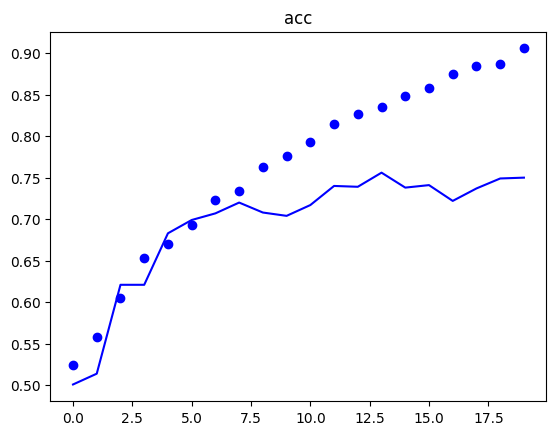

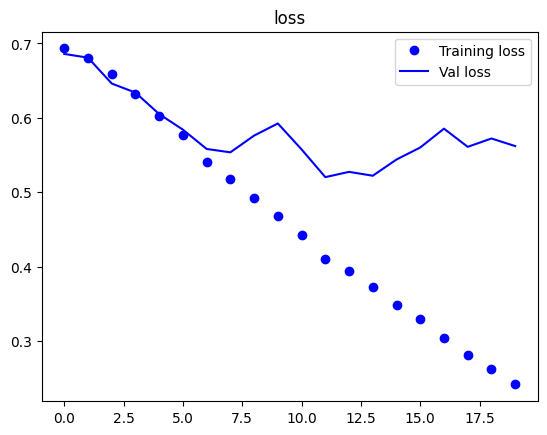

In [9]:
plot_loss_acc(history)

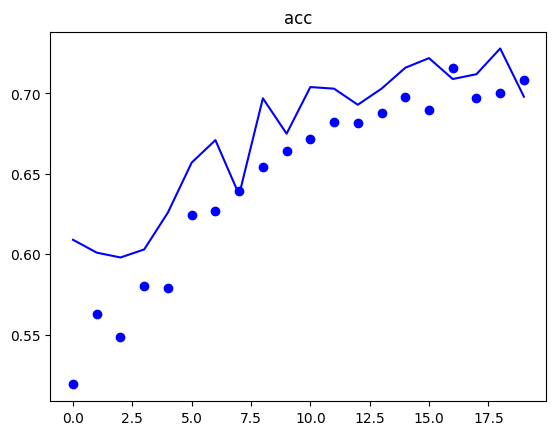

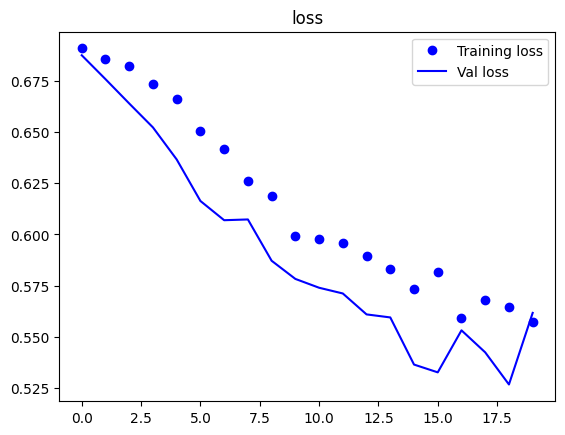

In [10]:
plot_loss_acc(history_aug)

### 2. Transfer Learning

Transfer Learning(전이 학습)은 

사전에 대규모의 데이터셋으로 학습한 모델을 가져와서 새로운 모델 학습에 저용하는 방법이다. 

크게 2가지로 구분 할 수 있는데, 
1. 사전 학습된 모델을 새로운 작업에 맞게 가중치는 재조정하면서 학습을 진행.
2. 사전 학습된 모델의 전체/일부를 feature extractor로 사용하는 것. (이때는 가져온 모델을 학습하지는 않는다.)


In [11]:
import wget
wget.download("https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5", "./")

'.//inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

구굴의 이미지 분류 모델인 인셉션 모델을 가져와보자

In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# 사전 학습 모델의 학습된 가중치 가져오기 
pre_trained_model.load_weights(local_weights_file)

# 가져온 모델의 레이어들 모두 학습 안되게
for layer in pre_trained_model.layers:
  layer.trainable = False

어디 한번 봐볼까?

In [13]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_8[0][0]']               
 alization)                                                                                       
                                                                                       

inceptionV3의 아키텍쳐는 다음과 같다.

![inceptionV3](./src/inception3.png)

In [14]:
# `mixed_7` 레이어를 가져와서 분류기로 사용해보자.
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


많은 데이터로 학습되어 있기 때문에, 우리 데이터에 맞게 fine tune하기 위해서는 모델의 일반성을 가져와야한다. 

Dropout을 추가해서 일반성을 보장하여 val_acc를 높여보자

In [21]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model


# 다음과 같이 api형태로 모델을 정의 할 수 있다.

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
# 0,1 이진 분류니까 sigmoid
x = layers.Dense  (1, activation='sigmoid')(x)           

# 모델이 정의되는 부분
model = Model(pre_trained_model.input, x) 
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_8[0][0]']               
 alization)                                                                                       
                                                                                            

In [16]:
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [17]:
!python -m wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip


Saved under cats_and_dogs_filtered (1).zip


In [18]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') 

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') 

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 51s - loss: 0.3669 - accuracy: 0.8550 - val_loss: 0.1793 - val_accuracy: 0.9370 - 51s/epoch - 508ms/step
Epoch 2/20
100/100 - 45s - loss: 0.1857 - accuracy: 0.9270 - val_loss: 0.1037 - val_accuracy: 0.9570 - 45s/epoch - 448ms/step
Epoch 3/20
100/100 - 44s - loss: 0.1693 - accuracy: 0.9265 - val_loss: 0.1139 - val_accuracy: 0.9630 - 44s/epoch - 442ms/step
Epoch 4/20
100/100 - 44s - loss: 0.1878 - accuracy: 0.9315 - val_loss: 0.2000 - val_accuracy: 0.9310 - 44s/epoch - 439ms/step
Epoch 5/20
100/100 - 45s - loss: 0.1553 - accuracy: 0.9410 - val_loss: 0.0980 - val_accuracy: 0.9640 - 45s/epoch - 446ms/step
Epoch 6/20
100/100 - 44s - loss: 0.1579 - accuracy: 0.9435 - val_loss: 0.1161 - val_accuracy: 0.9570 - 44s/epoch - 441ms/step
Epoch 7/20
100/100 - 43s - loss: 0.1547 - accuracy: 0.9420 - val_loss: 0.1146 - val_accuracy: 0.9570 - 43s/epoch - 434ms/step
Epoch 8/20
100/100 - 43s - loss: 0.1475 - accuracy: 0.9410 - val_loss: 0.0765 - val_accuracy: 0.9690 - 43s/epoch - 435

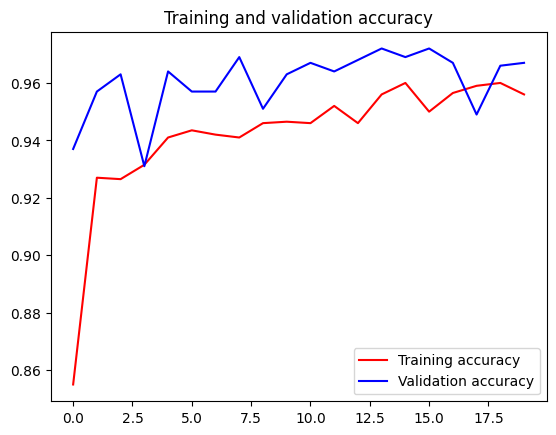

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

일반성이 잘 보장되는 것을 볼 수 있다.

### 3. Multi-Class

멀티 클래스로 진행해보자. 사실 별로 바뀌는건 없는데,

- ImageDataGenerator에서 데이터를 가져올 때, class_mode가 binary를 categorical로 두고,
- 마지막 layer의 0~1의 확률값으로 출력하는 sigmoid함수 대신 다중 클래스중 1값을 극대화 해주는softmax를 넣어주고,
- model.compile 할 때, loss 함수도, categorical_crossentropy를 쓰면 된다.


데이터를 웹겟으로 다운받고

In [23]:
# Download the train set
!python -m wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!python -m wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip


Saved under rps.zip

Saved under rps-test-set.zip


압축을 풀어주고, 경로를 지정해주자

In [24]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp/rps-test')
zip_ref.close()

In [25]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


이미지 예시를 봐보자

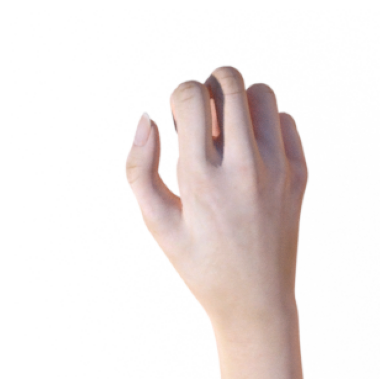

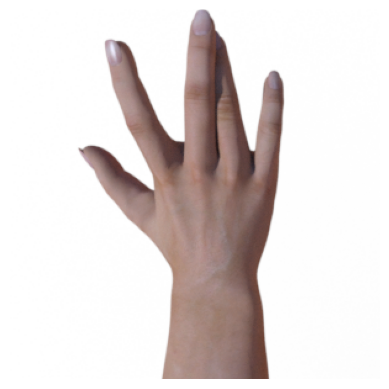

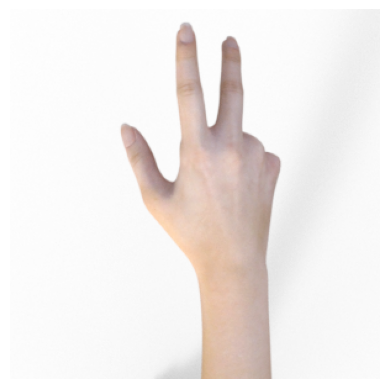

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index-1]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index-1]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index-1]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

모델 빌드

In [33]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [36]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [37]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 49s 2s/step - loss: 1.2381 - accuracy: 0.3409 - val_loss: 1.0930 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 38s 2s/step - loss: 1.0946 - accuracy: 0.3849 - val_loss: 1.0910 - val_accuracy: 0.3737
Epoch 3/25
20/20 [==============================] - 38s 2s/step - loss: 1.0710 - accuracy: 0.4079 - val_loss: 0.8409 - val_accuracy: 0.5995
Epoch 4/25
20/20 [==============================] - 38s 2s/step - loss: 1.0179 - accuracy: 0.4948 - val_loss: 0.6823 - val_accuracy: 0.8387
Epoch 5/25
20/20 [==============================] - 38s 2s/step - loss: 0.8788 - accuracy: 0.5869 - val_loss: 0.4211 - val_accuracy: 0.9086
Epoch 6/25
20/20 [==============================] - 39s 2s/step - loss: 0.7621 - accuracy: 0.6353 - val_loss: 0.4389 - val_accuracy: 0.7043
Epoch 7/25
20/20 [==============================] - 38s 2s/step - loss: 0.6296 - accuracy: 0.7147 - val_loss: 0.5865 - val_accuracy: 0.6882
Epoch 8/25
20/20 [==

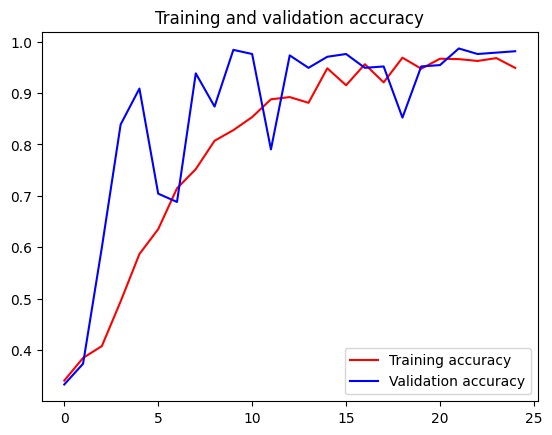

<Figure size 640x480 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)